In [122]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [120]:
data_path = '/Users/adamkaminski/Desktop/PhD/Research_and_grants/Paper_1/Analyses'
cbcl_data = pd.read_csv(f'{data_path}/ppi_analysis_cbcl.csv')
cbcl_data

,Anxious/Depressed t,Withdrawn/Depressed t,Somatic Complaints t,Social Problems t,Thought Problems t,Attention Problems t,Rule-Breaking Behavior t,Aggressive Behavior t,cbcl_intern_t,cbcl_extern_t,Total Problems t,Dx,VABS_ABC
0,57,76,64,58,61,52,67,68,68,69,67,NOS,93
1,74,60,54,70,63,65,57,55,68,56,65,ASD,78
2,67,79,68,69,71,69,51,53,73,51,70,ASD,66
3,69,68,64,58,70,61,57,64,70,62,70,ADHD,94
4,67,73,70,62,70,83,64,65,72,65,72,ADHD,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,66,70,57,58,51,66,51,66,68,62,65,ADHD,88
85,54,56,50,54,71,62,59,73,52,71,63,ASD,88
86,66,66,57,62,73,69,70,61,66,64,71,ASD,81
87,72,75,67,84,84,90,68,91,72,78,82,ASD,64


In [114]:
syndrome_scales = cbcl_data.iloc[:,0:8]
syndrome_scales

,Anxious/Depressed t,Withdrawn/Depressed t,Somatic Complaints t,Social Problems t,Thought Problems t,Attention Problems t,Rule-Breaking Behavior t,Aggressive Behavior t
0,57,76,64,58,61,52,67,68
1,74,60,54,70,63,65,57,55
2,67,79,68,69,71,69,51,53
3,69,68,64,58,70,61,57,64
4,67,73,70,62,70,83,64,65
...,...,...,...,...,...,...,...,...
84,66,70,57,58,51,66,51,66
85,54,56,50,54,71,62,59,73
86,66,66,57,62,73,69,70,61
87,72,75,67,84,84,90,68,91


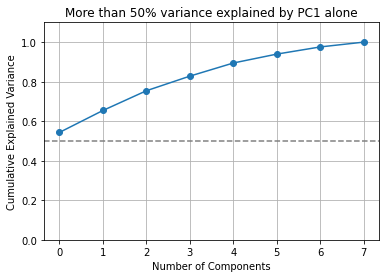

In [115]:
# apply pca
pca = PCA(n_components=8)
pca.fit(syndrome_scales)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('More than 50% variance explained by PC1 alone')
plt.grid(True)
plt.ylim(0,1.1)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

In [118]:
# define function for plotting
def scatter_plot(x,y,ylab):
    
    # get primary diagnosis and color map
    grouping_variable = cbcl_data.loc[:,'Dx']
    color_map = {'ADHD': 'red', 'ASD': 'darkkhaki', 'GAD':'green', 'OCD':'blue', 'NOS':'purple'}
    
    # get line of best fit
    model = LinearRegression()
    model.fit(PC1.reshape(-1, 1), y.reshape(-1, 1))
    y_pred = model.predict(PC1.reshape(-1,1))
    
    # plot scatter plot
    fig = plt.figure(figsize=(3,3),dpi=200)
    plt.scatter(PC1, y, c=[color_map[group] for group in grouping_variable])
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=group) for group, color in color_map.items()]
    plt.legend(handles=legend_handles)
    plt.plot(PC1, y_pred, color='red', label='Line of Best Fit')
    plt.xlabel('P-factor')
    plt.ylabel(ylab)
    plt.show()

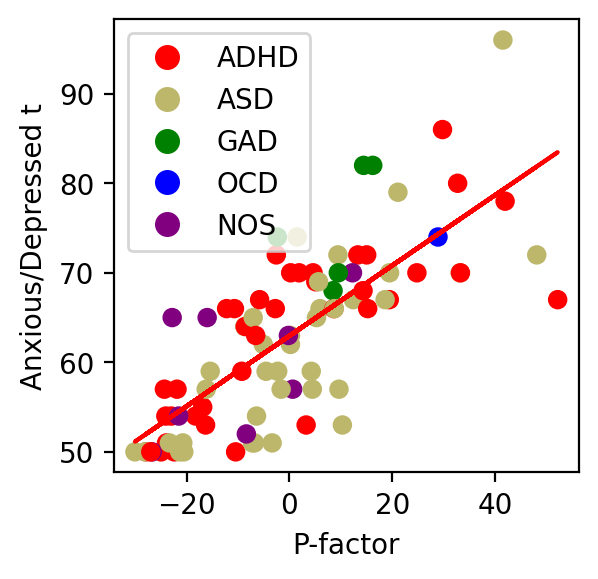

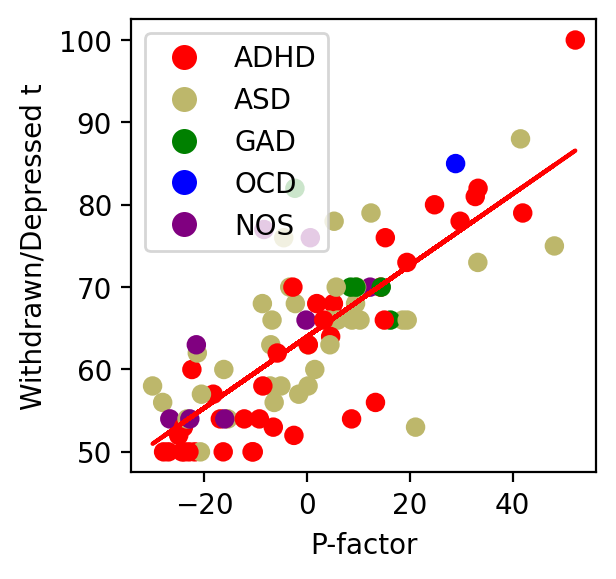

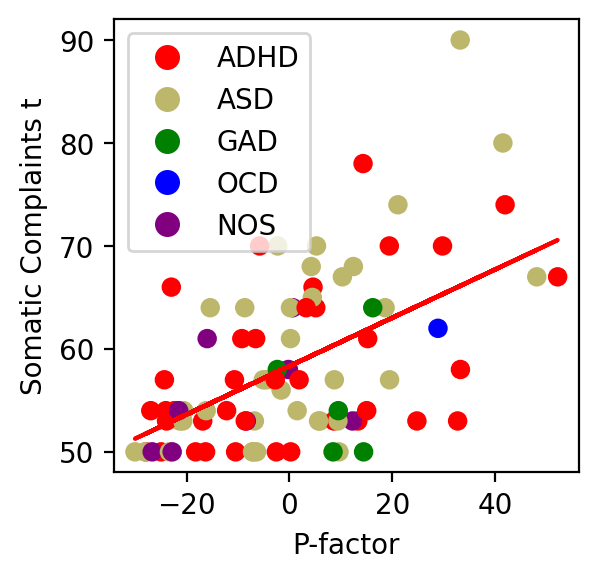

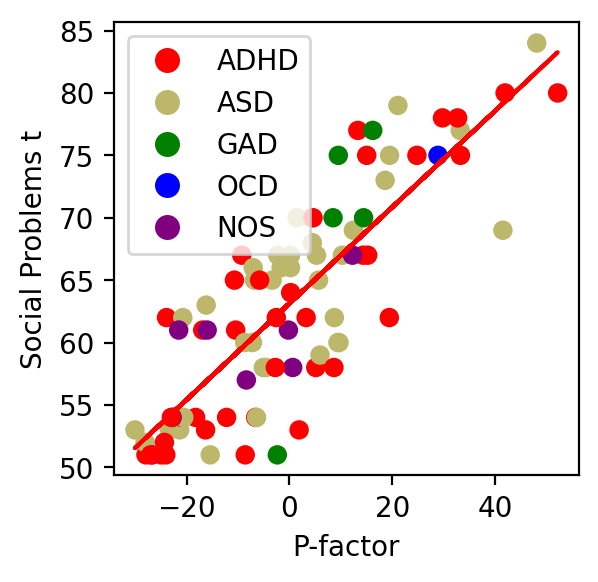

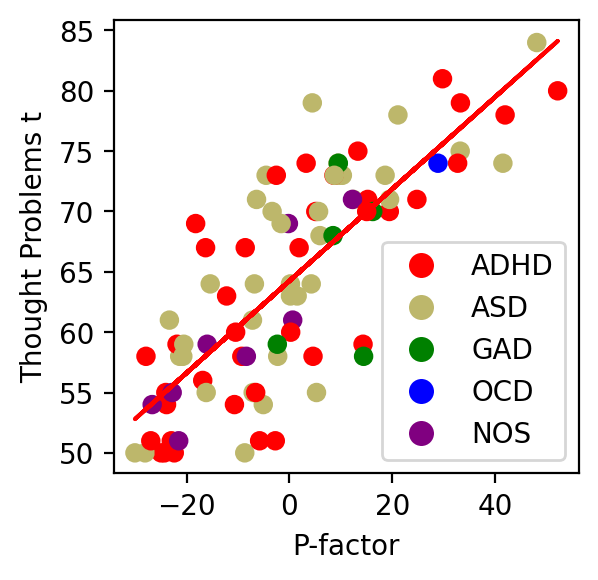

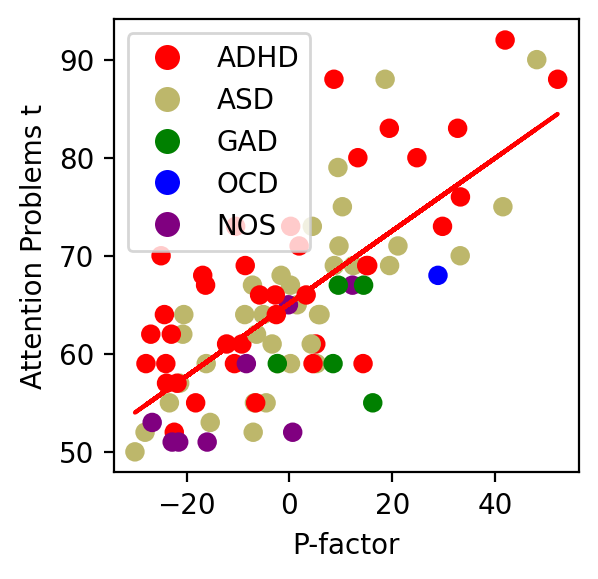

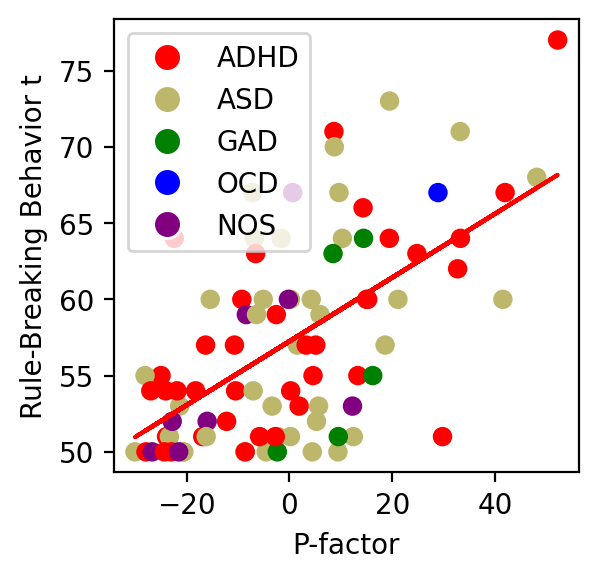

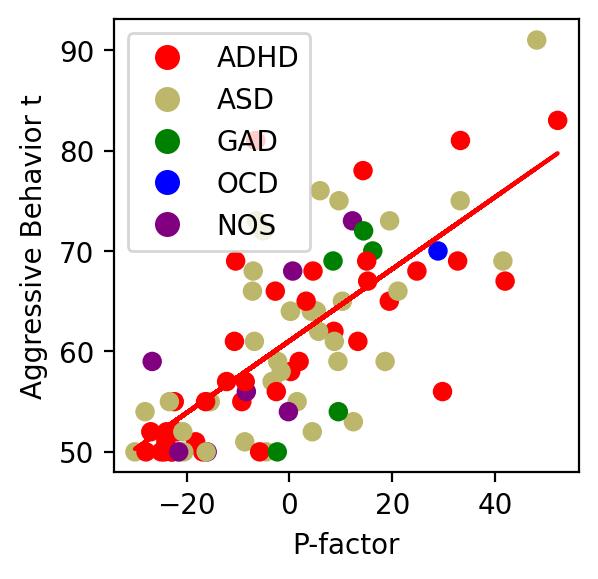

In [119]:
# get p-factor
transformed_data = pca.fit_transform(syndrome_scales)
PC1 = transformed_data[:,0]

# plot scatter plots
for col in syndrome_scales.columns:
    scatter_plot(PC1,syndrome_scales.loc[:,col].values,col)

In [124]:
corr_coef, p_value = stats.pearsonr(cbcl_data.loc[:,'VABS_ABC'],PC1)
print(corr_coef)
print(p_value)

-0.5529620693776635
1.919783371503323e-08
